# Report 1 Content

## Data Pre-Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product_attribute = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Cleaned Data/Product Attributes.xlsx')
fz_meat = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2020.xlsx')
fz_meat2 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2021.xlsx')
fz_meat3 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2022.xlsx')
fz_meat4 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2023.xlsx')
fz_meat5 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2024.xlsx')

In [3]:
product_attribute.head()

Product  UPC 13 digit  \
0  AL SAFA HALAL FROZEN BEEF HOTDOG 12.6 OZ - 062...  624967436101   
1  AL SAFA HALAL FROZEN CHICKEN FRANKFURTER 12 OZ...  624967508101   
2  CLOVERDALE MEATS FROZEN BEEF AND PORK FRANKFUR...   76829017602   
3  COUNTRY FRESH MEATS FROZEN PORK AND BEEF HOTDO...  829905000521   
4   NOBRAND FROZEN BEEF HOTDOG 80 OZ - 0694022680771  694022680771   

                          Aisle Name Category Name Sub-Category Name  \
0  AISLE-FROZEN MEAT/POULTRY/SEAFOOD     MEAT - FZ   FZ FRANKFURTERS   
1  AISLE-FROZEN MEAT/POULTRY/SEAFOOD     MEAT - FZ   FZ FRANKFURTERS   
2  AISLE-FROZEN MEAT/POULTRY/SEAFOOD     MEAT - FZ   FZ FRANKFURTERS   
3  AISLE-FROZEN MEAT/POULTRY/SEAFOOD     MEAT - FZ   FZ FRANKFURTERS   
4  AISLE-FROZEN MEAT/POULTRY/SEAFOOD     MEAT - FZ   FZ FRANKFURTERS   

         Manufacturer Name Brand Franchise Name           Brand Name  \
0            AL SAFA HALAL        AL SAFA HALAL        AL SAFA HALAL   
1            AL SAFA HALAL        AL SAFA HALAL        AL SAFA HALAL   
2      CLOVERDALE FOODS CO           CLOVERDALE     CLOVERDALE MEATS   
3  COUNTRY FRESH MEATS INC  COUNTRY FRESH MEATS  COUNTRY FRESH MEATS   
4          FAIR MARKET INC              NOBRAND              NOBRAND   

         Package  Total Count  Total Ounces Form    Flavor / Scent  \
0  VACUUM PACKED          8.0          12.6  NaN           REGULAR   
1  VACUUM PACKED          6.0          12.0  NaN           REGULAR   
2            BOX         40.0         160.0  NaN           REGULAR   
3  VACUUM PACKED          8.0          16.0  NaN      COLBY CHEESE   
4            BOX         20.0          80.0  NaN  CHEDDAR JALAPENO   

     Meat Source Product Type Type Of Meat Substituted Type Of Substitute  \
0           BEEF      HOT DOG                      NaN                NaN   
1        CHICKEN  FRANKFURTER                      NaN                NaN   
2  BEEF AND PORK  FRANKFURTER                      NaN                NaN   
3  PORK AND BEEF      HOT DOG                      NaN                NaN   
4           BEEF      HOT DOG                      NaN                NaN   

  Cooked Info  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [4]:
fz_meat.count()

Geography                                          221397
Time                                               221397
Product                                            221397
UPC 13 digit                                       221397
Unit Sales                                         221397
Unit Sales No Merch                                217766
Unit Sales Any Merch                               143217
Unit Sales Price Reductions Only                   137308
Unit Sales Feature Only                             25455
Unit Sales Display Only                             38319
Unit Sales Special Pack Only                            0
Unit Sales Feature and Display                       4936
Volume Sales                                       221397
Volume Sales No Merch                              217766
Volume Sales Any Merch                             143217
Volume Sales Price Reductions Only                 137308
Volume Sales Feature Only                           25455
Volume Sales D

In [5]:
# Imputation
def imputation_process(row):
    row['Incremental Units'] = row['Unit Sales'] - row['Base Unit Sales']
    row['Incremental Volume'] = row['Volume Sales'] - row['Base Volume Sales']
    row['Incremental Dollars'] = row['Dollar Sales'] - row['Base Dollar Sales']
    return row

# Split Geography column and only save its location
def extract_location(col):
    return col.split(' - ')[0]

# convert time into year month and day
def parse_time(col):
    # Year, month, day
    sep_data = col.split('-')
    year = int('20' + sep_data[2])
    month = int(sep_data[0][-2:])
    day = int(sep_data[1])
    # Quarter of given date
    quarter = (month - 1) // 3 + 1
    return pd.Series([year, quarter, month], index = ['Year', 'Quarter', 'Month'])

# Split product column and only save company name and product name
def parse_product(col):  
    return col.split(' - ')[0]


# Based on length of company name, select product name
def extract_product_name(full_string, brand_name):
    brand_name_length = len(brand_name)
    words = full_string[brand_name_length:].strip()
    return words

# # Arrange columns order
def change_column_order(df):
    final_order = [
        'Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name',
        'Brand Name', 'Product Name', 'Flavor / Scent', 'Meat Source',
        'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit', 
        'Price per Volume', 'Base Unit Sales', 'Base Volume Sales', 'Base Dollar Sales',
        'Incremental Units', 'Incremental Volume', 'Incremental Dollars', 
        'ACV Weighted Distribution'
    ]
    return df[final_order]

def merge_content(df1, df2):
    combined = df1.merge(df2, how = 'left', on = 'Product')
    return combined

def map_season(month):
    # Northern Hemisphere standard mapping
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


# Full tranform process
def transform_data(df, df2):
    table1 = merge_content(df, df2)
    # Used customized function
    table1['Geography'] = table1['Geography'].map(extract_location)
    table1[['Year', 'Quarter', 'Month']] = table1['Time'].apply(parse_time)
    table1['Product'] = table1['Product'].map(parse_product)
    table1['Product Name'] = table1.apply(lambda row: extract_product_name(row['Product'], row['Brand Name']), axis=1)
    #df['Product Name'] = df.apply(extract_product_name(df['Product'], df['Brand']), axis = 1)
    
    # Mapping quarter to seasonality
    table1['Season'] = table1['Month'].apply(map_season)
    # Change column order
    transformed = change_column_order(table1).apply(imputation_process, axis = 1)
    return transformed

In [6]:
combined = transform_data(fz_meat, product_attribute)
combined2 = transform_data(fz_meat2, product_attribute)
combined3 = transform_data(fz_meat3, product_attribute)
combined4 = transform_data(fz_meat4, product_attribute)
combined5 = transform_data(fz_meat5, product_attribute)

In [7]:
full_fz_rfg_sub = pd.concat([combined, combined2, combined3, combined4, combined5])

In [8]:
# output_file = '/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/full_fz_rfg_sub.csv'
# full_fz_rfg_sub.to_csv(output_file, index=False)

In [9]:
#test = fz_meat.merge(product_attribute, how = 'left', on = 'Product')
full_fz_rfg_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991780 entries, 0 to 12727
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Geography                  991780 non-null  object 
 1   Year                       991780 non-null  int64  
 2   Quarter                    991780 non-null  int64  
 3   Month                      991780 non-null  int64  
 4   Season                     991780 non-null  object 
 5   Form                       991780 non-null  object 
 6   Manufacturer Name          991780 non-null  object 
 7   Brand Name                 991780 non-null  object 
 8   Product Name               991780 non-null  object 
 9   Flavor / Scent             991780 non-null  object 
 10  Meat Source                0 non-null       float64
 11  Unit Sales                 991780 non-null  float64
 12  Volume Sales               991780 non-null  float64
 13  Dollar Sales               991780 n

In [10]:
full_fz_rfg_sub['Form'].unique()

array(['GROUND', 'BALL', 'BURGER PATTY', 'CRUMBLE', 'PATTY', 'BURGER',
       'LINK', 'MEATBALL', 'PIECE', 'SLICED', 'STEAK', 'SPARE RIBS',
       'CHUNK', 'TIP', 'SLICE', 'BREAKFAST PATTY', 'FILET', 'SLIDER',
       'CAKE', 'STRIP', 'BITE', 'POPPER', 'BREAKFAST SAUSAGE PATTY',
       'HOT DOG', 'PULLED', 'BREAKFAST LINK', 'FRANK', 'ROAST', 'WHOLE',
       'STICK', 'NOT STATED ON PACKAGE', 'BLOCK', 'ROLL', 'NUGGET',
       'BREAST', 'FINGER', 'TENDER', 'WING', 'CUTLET', 'DICED', 'POPCORN',
       'DIPPER', 'BREAKFAST BITES', 'CHUB', 'DINNER SAUSAGE LINK', 'CUBE',
       'BAR', 'LOAF', 'MEAT LOAF', 'BRATWURST', 'BREAKFAST SAUSAGE ROLL',
       'SPLIT ROPE', 'ROPE', 'ULTRA THIN SLICE', 'DELI SLICED', 'CUT',
       'BREAKFAST SAUSAGE LINK', 'GIZZARD', 'RIBLET', 'SAUSAGE',
       'DINNER LINK', 'DRUMSTICK', 'FUN NUGGETS', 'SHREDS', 'SHREDDED',
       'FRIES', 'TENDERS', 'BINGS', 'SAUSAGE PATTY', 'BAO BUN'],
      dtype=object)

In [11]:
# Morningstars marketshare
# Impossible marketsharex
# Combine Gardein & Gardein ultimate plant-based dollar sales
# Percentage Sales in Tender & Nug from MORNINGSTAR FARMS INCOGMEATO & GARDEIN ULTIMATE PLANT BASED & IMPOSSIBLE (or maybe top 3 sales company)

In [12]:
# NUMERIC CORRELATION IS USELESS
# corrmat = combined[numeric_col].corr().round(2)
# top_corr_features = corrmat.index
# plt.figure(figsize=(7, 7))
# sns.heatmap(combined[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
#             cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

In [13]:
# output_file = '/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/test_merge.csv'
# combined.to_csv(output_file, index=False)

## Data Loading

In [4]:
full_fz_rfg_sub = pd.read_csv('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/full_fz_rfg_sub.csv')

## Analysis on TOP 10 Manufacture & Sales

<Figure size 1000x800 with 0 Axes>

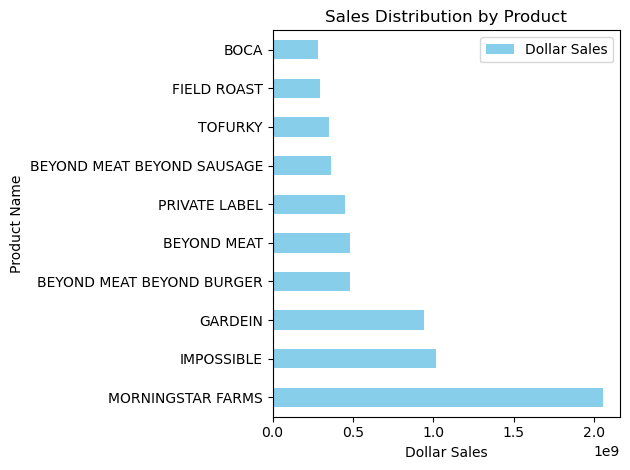

In [5]:
# Sales Distribution: Analyze the distribution of dollar sales across different manufacturers and brands to see which are the most popular or profitable.
brand_sales = full_fz_rfg_sub.groupby('Brand Name').agg({'Dollar Sales':'sum'}).sort_values('Dollar Sales', ascending = False).head(10)
brand_sales.reset_index()
#sns.barplot(data = brand_sales, x = 'Brand Name', y = 'Dollar Sales')
plt.figure(figsize=(10, 8))
brand_sales.plot(kind='barh', color='skyblue')
plt.title('Sales Distribution by Product')
plt.xlabel('Dollar Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [6]:
brand_sales = combined.groupby('Brand Name')['Dollar Sales'].sum().reset_index()

total_market_sales = brand_sales['Dollar Sales'].sum()


brand_sales['Market Share (%)'] = (brand_sales['Dollar Sales'] / total_market_sales) * 100
new_brand_sales = brand_sales.sort_values('Market Share (%)', ascending = False).head(10)
brand_sales, total_market_sales
# #Pie Chart for Market Share
# plt.figure(figsize=(10, 8))
# plt.pie(new_brand_sales['Market Share (%)'], labels=new_brand_sales['Brand Name'], autopct='%1.1f%%', startangle=140)
# plt.title('Market Share by Brand (Dollar Sales)')
# #plt.show()

# #Bar Chart for Market Share
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Market Share (%)', y='Brand Name', data=new_brand_sales, palette='viridis')
# plt.title('Market Share by Brand (Dollar Sales)')
# plt.xlabel('Market Share (%)')
# plt.ylabel('Brand Name')
# #plt.show()

NameError: name 'combined' is not defined

The first three manufacture that make most sales for meat alternative is "Morningstar Farms", "Gardein", "Beyong Meat Beyond Burger"

## Analysis on Sales Distribution, Focusing on Sales Per Unit

In [7]:
no_outliers_price_descriptive_stats = full_fz_rfg_sub[full_fz_rfg_sub['Price per Unit'] < 10]

count    947324.000000
mean          5.159229
std           1.571876
min           0.010000
25%           4.014746
50%           4.938277
75%           5.990000
max           9.999656
Name: Price per Unit, dtype: float64


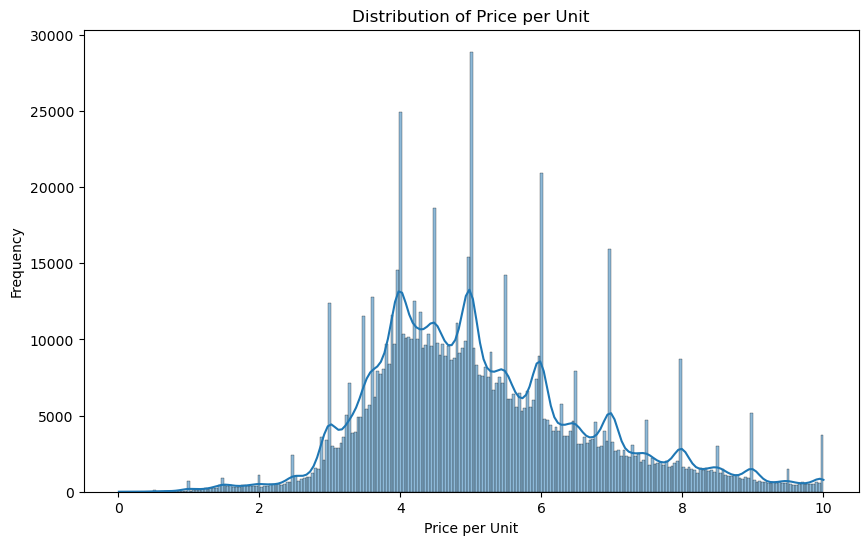

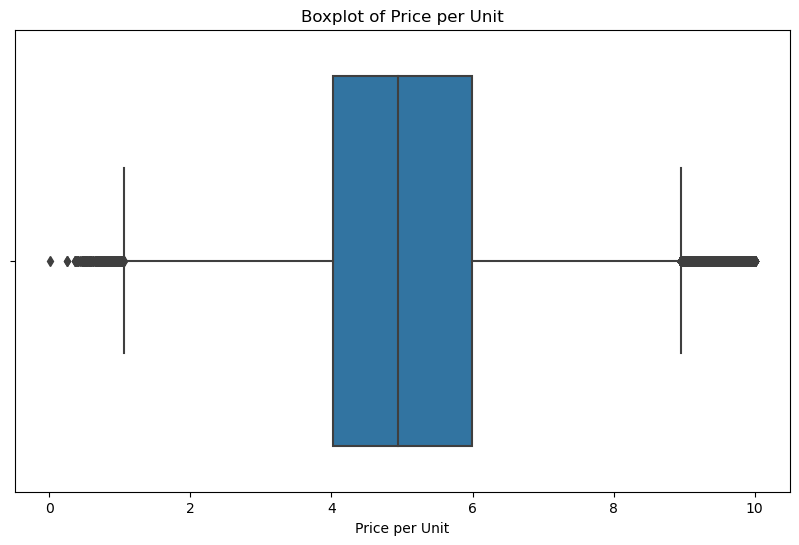

                Price per Unit  Dollar Sales
Price per Unit        1.000000      0.036067
Dollar Sales          0.036067      1.000000


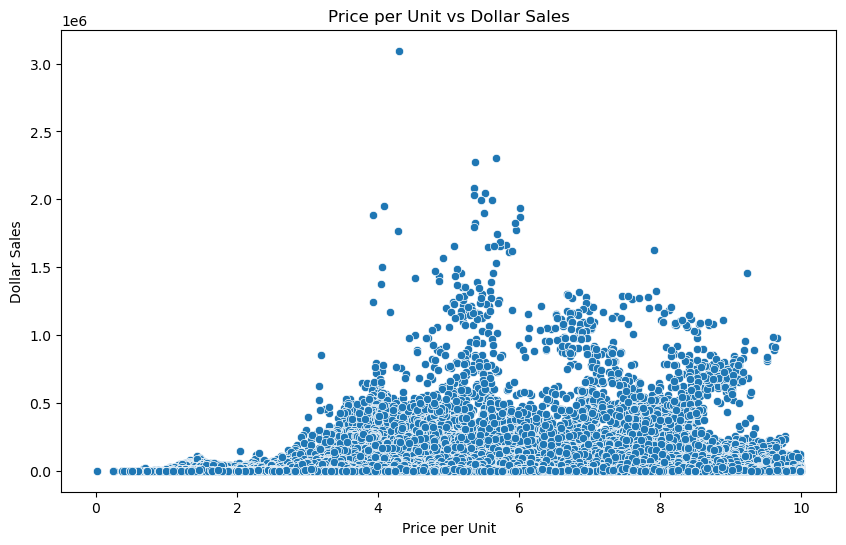

In [8]:
# Price Analysis: Study the price per unit to understand pricing strategies or to identify if there's a correlation between price and sales volume.
#price_descriptive_stats = full_fz_rfg_sub['Price per Unit'].describe()
price_descriptive_stats = no_outliers_price_descriptive_stats['Price per Unit'].describe()
print(price_descriptive_stats)

# Distribution of 'Price per Unit'
plt.figure(figsize=(10, 6))
sns.histplot(no_outliers_price_descriptive_stats['Price per Unit'], kde=True)
plt.title('Distribution of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Price per Unit'
plt.figure(figsize=(10, 6))
sns.boxplot(x=no_outliers_price_descriptive_stats['Price per Unit'])
plt.title('Boxplot of Price per Unit')
plt.xlabel('Price per Unit')
plt.show()

# Correlation analysis
correlation_matrix = no_outliers_price_descriptive_stats[['Price per Unit', 'Dollar Sales']].corr()
print(correlation_matrix)

# Scatter plot of 'Price per Unit' vs 'Dollar Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_outliers_price_descriptive_stats, x='Price per Unit', y='Dollar Sales')
plt.title('Price per Unit vs Dollar Sales')
plt.xlabel('Price per Unit')
plt.ylabel('Dollar Sales')
plt.show()

It's clearly that when price of a product is between (0, 10), the sales reach high point. However, there are several product that has sales above 20, but none of their sales reach to even 1.0*1e6 unit of sales, and there are considered as outliers.
<strong>We can remove them since the amount of outliers, compared to majority of data, is less.<Strong>

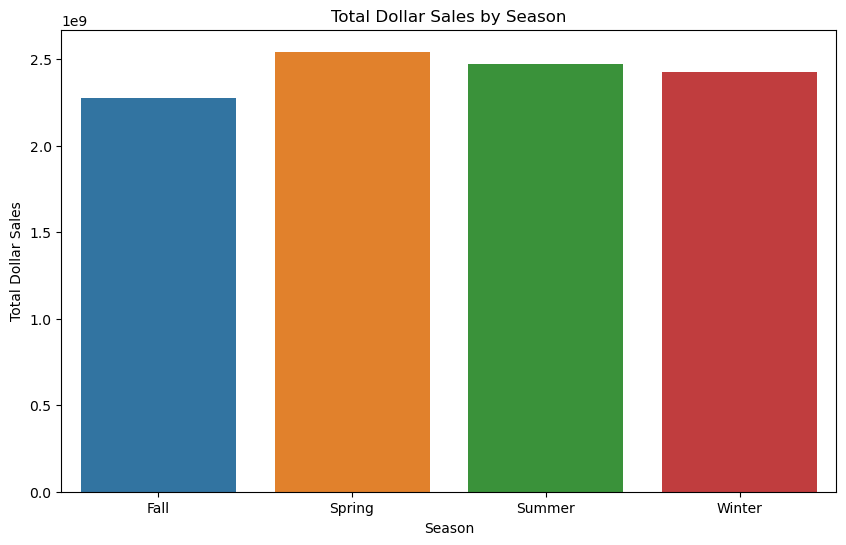

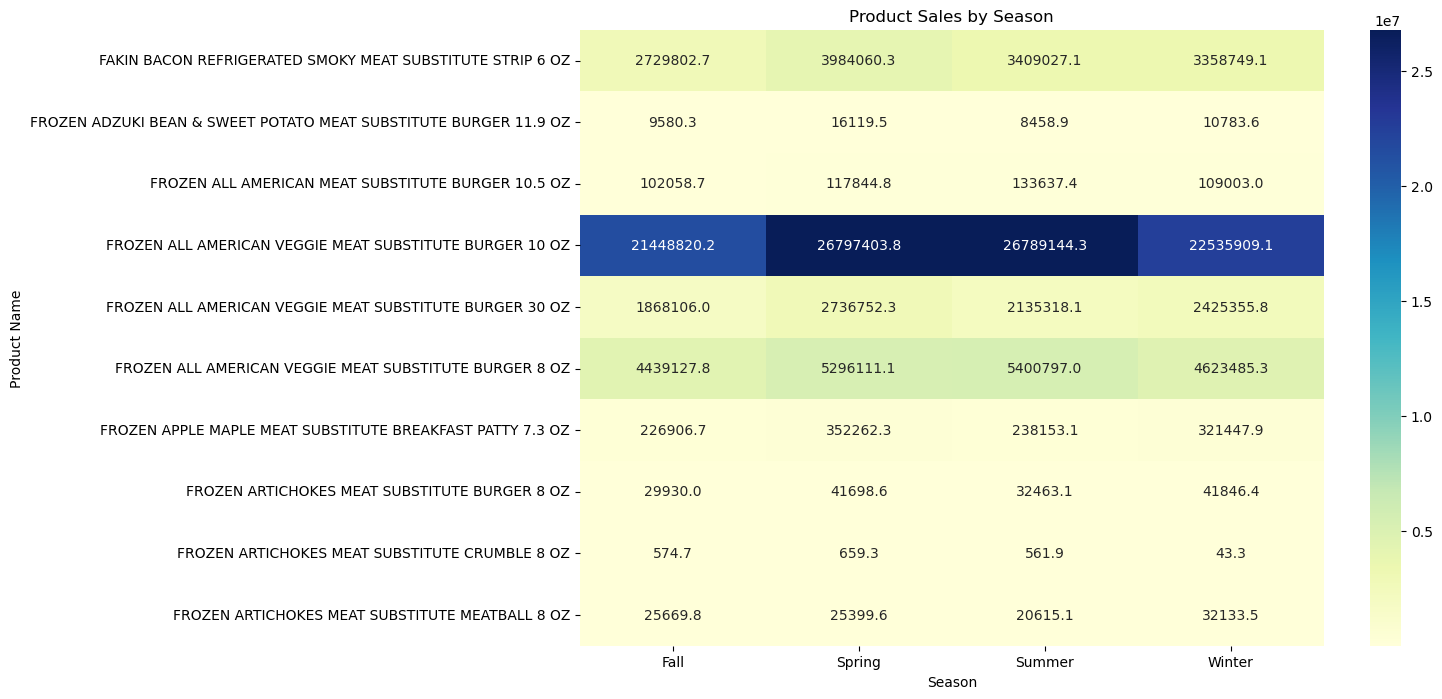

In [9]:
# Seasonality: Since the data includes a 'Season' column, you can examine seasonal trends in sales to determine if certain products sell better in certain seasons.
# Step 1: Aggregate Sales by Season
seasonal_sales = full_fz_rfg_sub.groupby('Season')['Dollar Sales'].sum().reset_index()

# Step 2: Visualize Sales Trends by Season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_sales, x='Season', y='Dollar Sales')
plt.title('Total Dollar Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Dollar Sales')
plt.show()

# Step 3: Compare Product Performance by Season
product_seasonal_sales = full_fz_rfg_sub.groupby(['Season', 'Product Name'])['Dollar Sales'].sum().reset_index()

# Creating a pivot table for better visualization
pivot_table = product_seasonal_sales.pivot(index='Product Name', columns='Season', values='Dollar Sales').head(10)

# Visualizing with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Product Sales by Season')
plt.xlabel('Season')
plt.ylabel('Product Name')
plt.show()

For all meat alternative products, sales difference in seasonality is not big, however, sales in Spring still higher than the rest season

## Analysis: Sales by Location

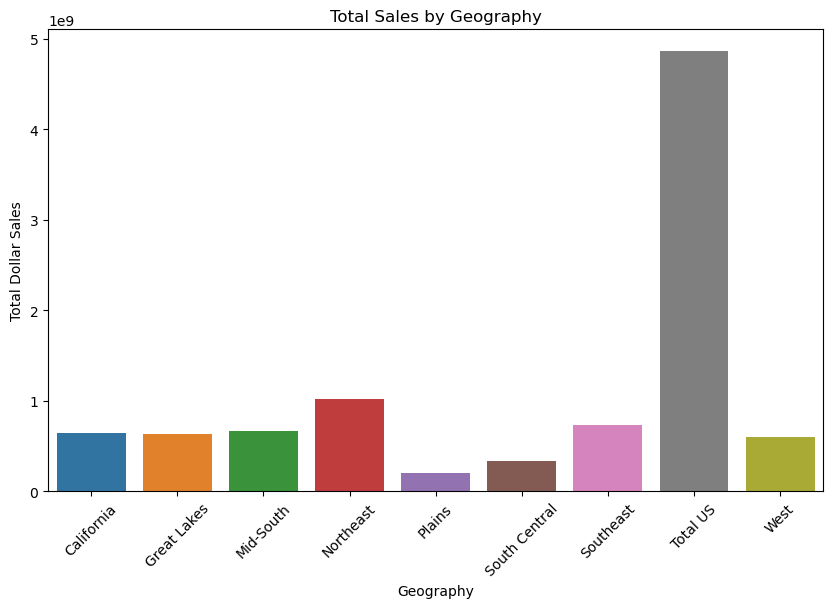

In [10]:
# Geographical Analysis: The 'Geography' column can be used to determine regional preferences or sales performance.
geo_sales_summary = full_fz_rfg_sub.groupby('Geography')['Dollar Sales'].agg(['sum', 'mean', 'count'])

# Step 2: Visualize Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_sales_summary.index, y=geo_sales_summary['sum'])
plt.title('Total Sales by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45)
plt.show()

Pattern:
1. Except mid region of U.S. such as Plains and South Central, all other regions have higher sales of meat alternative, especially in Northeast and Southeast.
2. This Probably because in mid region, people prefer to eat meat
3. It might be associated with slaughter industry

## Analysis: Seasonality

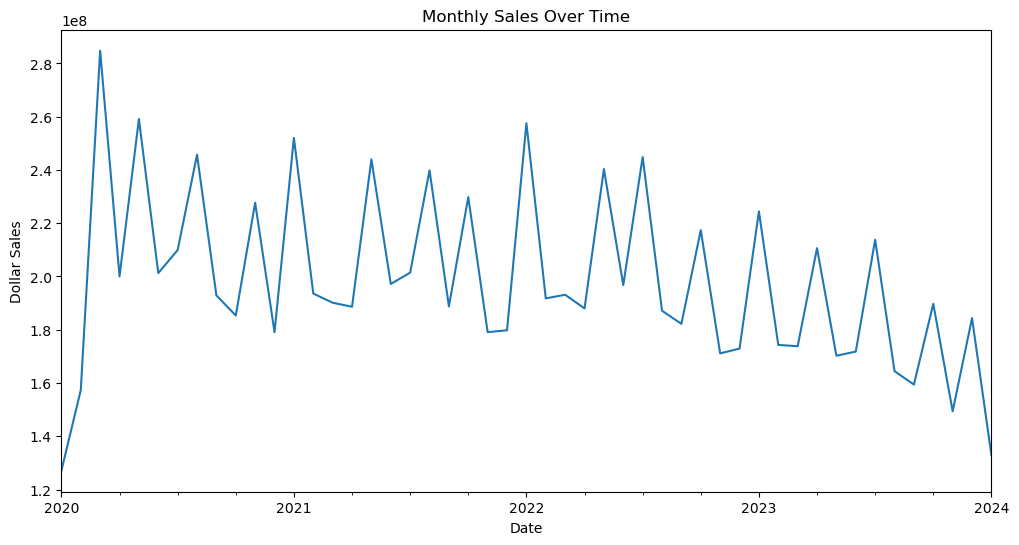

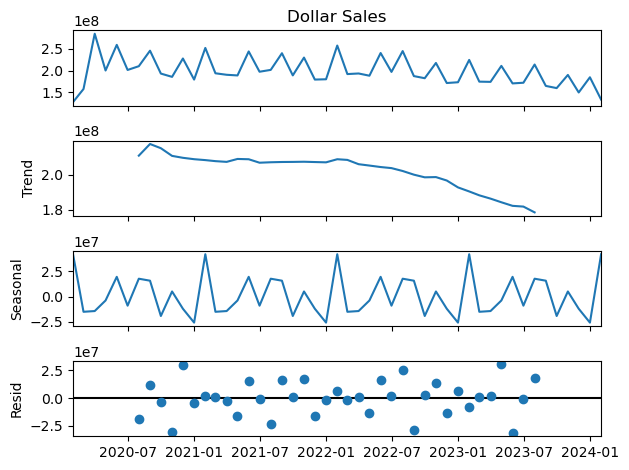

In [11]:
# Time Series Analysis: Use the 'Year', 'Quarter', and 'Month' columns to perform a time series analysis to see sales trends over time.

from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series Analysis: Use the 'Year', 'Quarter', and 'Month' columns to perform a time series analysis to see sales trends over time.
full_fz_rfg_sub['Date'] = pd.to_datetime(full_fz_rfg_sub['Year'].astype(str) + '-' + (full_fz_rfg_sub['Month']).astype(str))

# Step 2: Aggregate Sales Over Time
# Set the date as the index and sort it
full_fz_rfg_sub.set_index('Date', inplace=True)
full_fz_rfg_sub.sort_index(inplace=True)

# Resample the data monthly and sum up the sales
monthly_sales = full_fz_rfg_sub['Dollar Sales'].resample('M').sum()

# Step 3: Visualize Sales Trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Dollar Sales')
plt.show()

# Step 4: Decompose the Time Series
result = seasonal_decompose(monthly_sales, model='additive')
result.plot()
plt.show()

Pattern
1. Data in 2024 is not sufficient
2. In each year, sales reach to high point and gradually decrease by the time until the end of the year
3. It might because 
    1. Spring produce more vegetables
    2. Hot weather in Summer make people have less appetize
    3. People tend to eat foods with high-energy, high-calories
4. The overall trend of meat alternative sales is in decrease

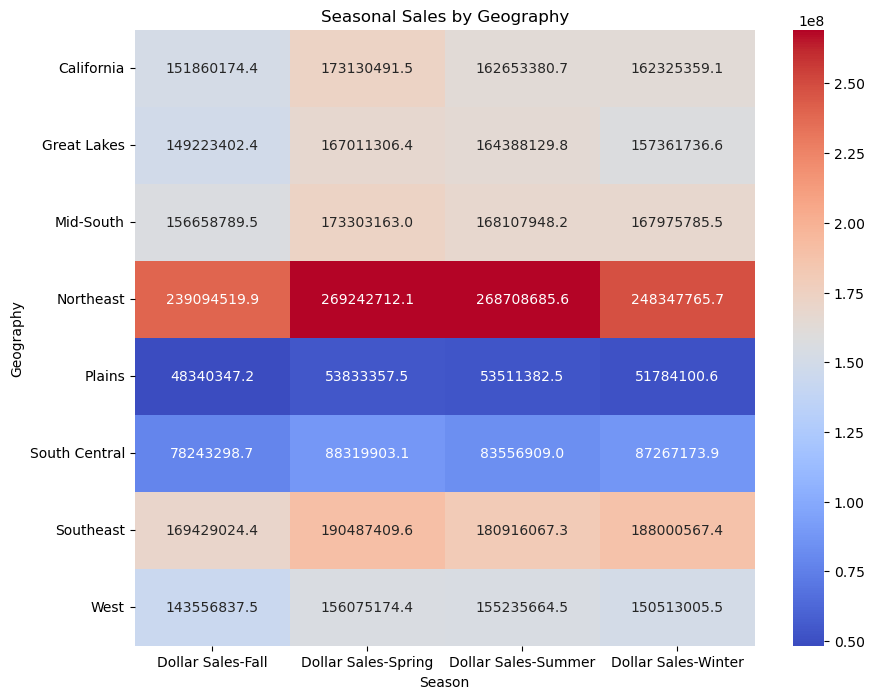

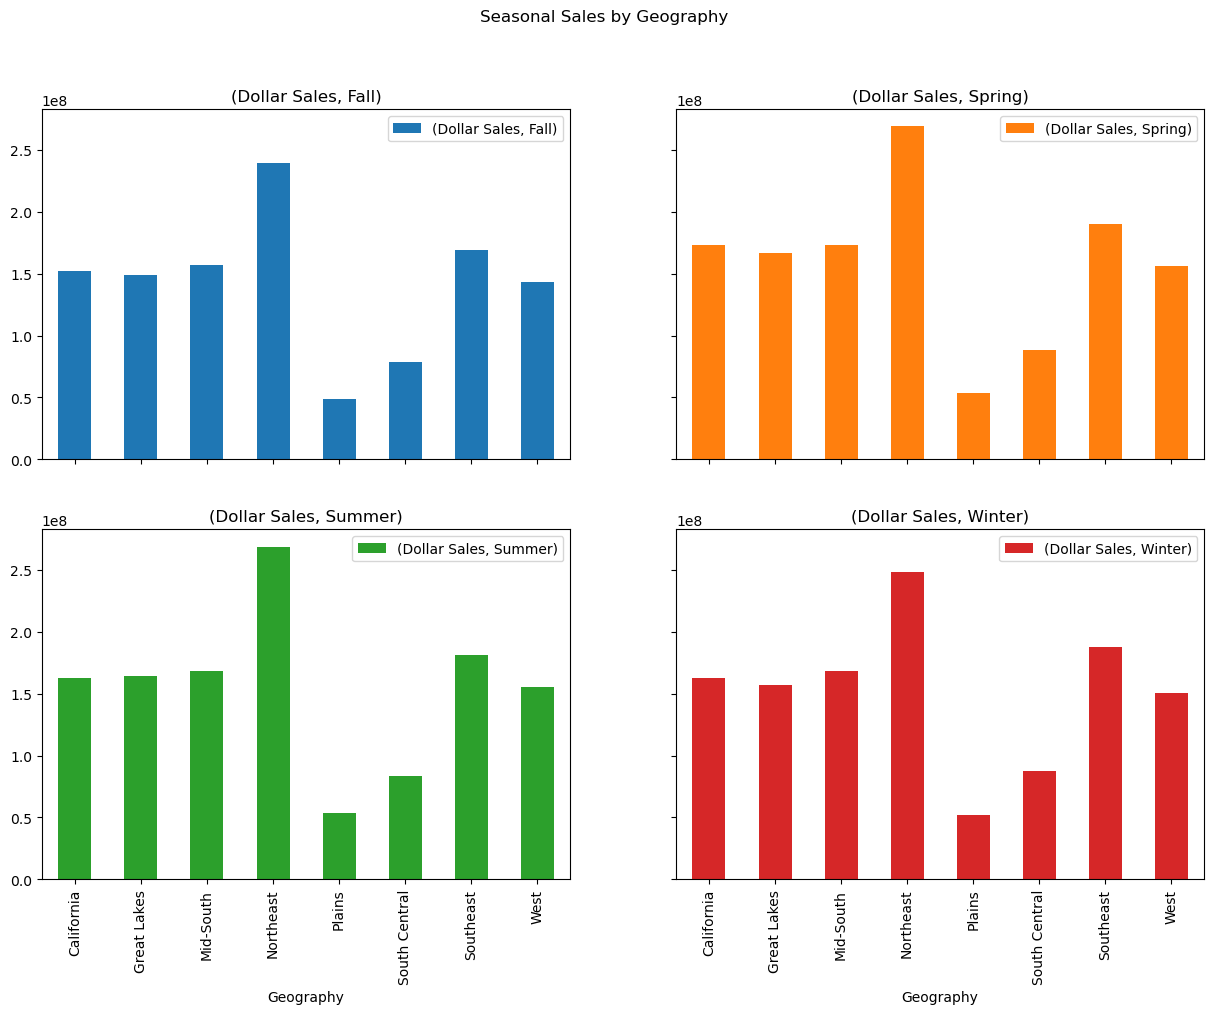

In [12]:
# Filter data
filtered_df = full_fz_rfg_sub[full_fz_rfg_sub['Geography'] != 'Total US']
# Step 1: Create a Pivot Table
pivot_table = filtered_df.pivot_table(
    values='Dollar Sales', 
    index=['Geography', 'Season'], 
    aggfunc='sum'
).sort_index()

# Step 2: Visualize Data
# For a simple heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table.unstack(level='Season'), cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Seasonal Sales by Geography')
plt.xlabel('Season')
plt.ylabel('Geography')
plt.show()

# For bar charts, if you want to compare seasons across geographies:
pivot_table.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(15, 10), sharey=True)
plt.suptitle('Seasonal Sales by Geography')
plt.show()

# Step 3: Statistical Analysis
# Depending on your requirements, you might perform an ANOVA test, time series decomposition, etc.


## Product & Flavor & Value | Unit Analysis

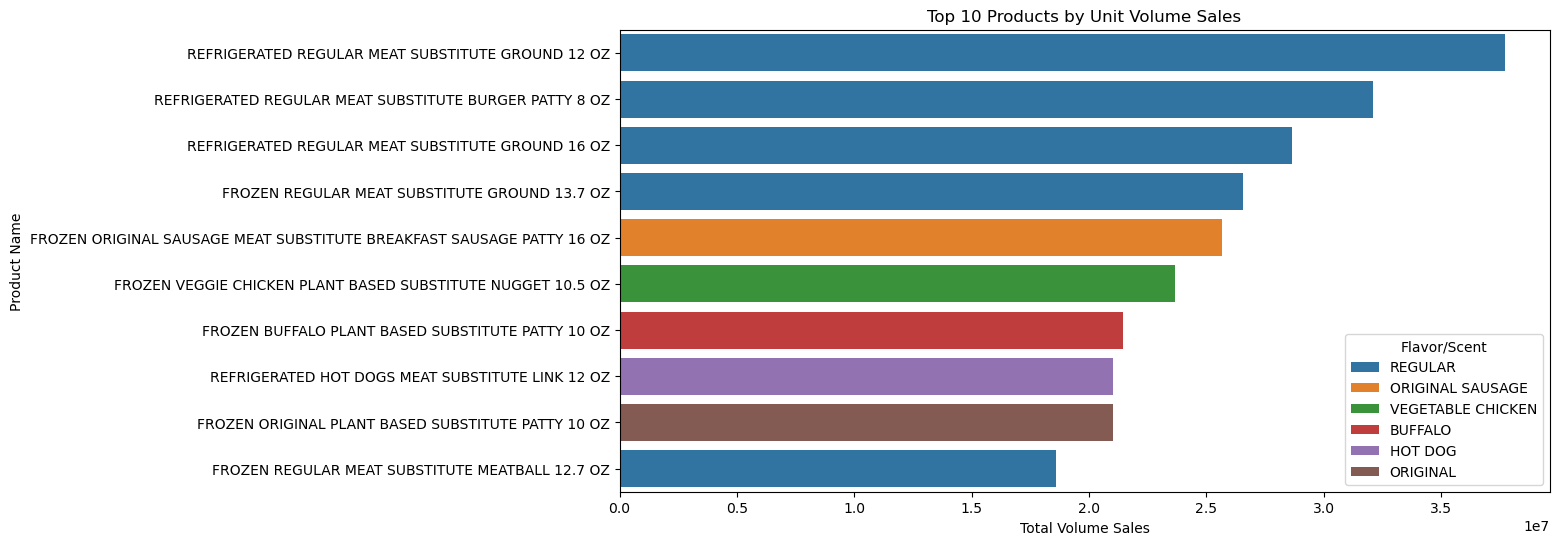

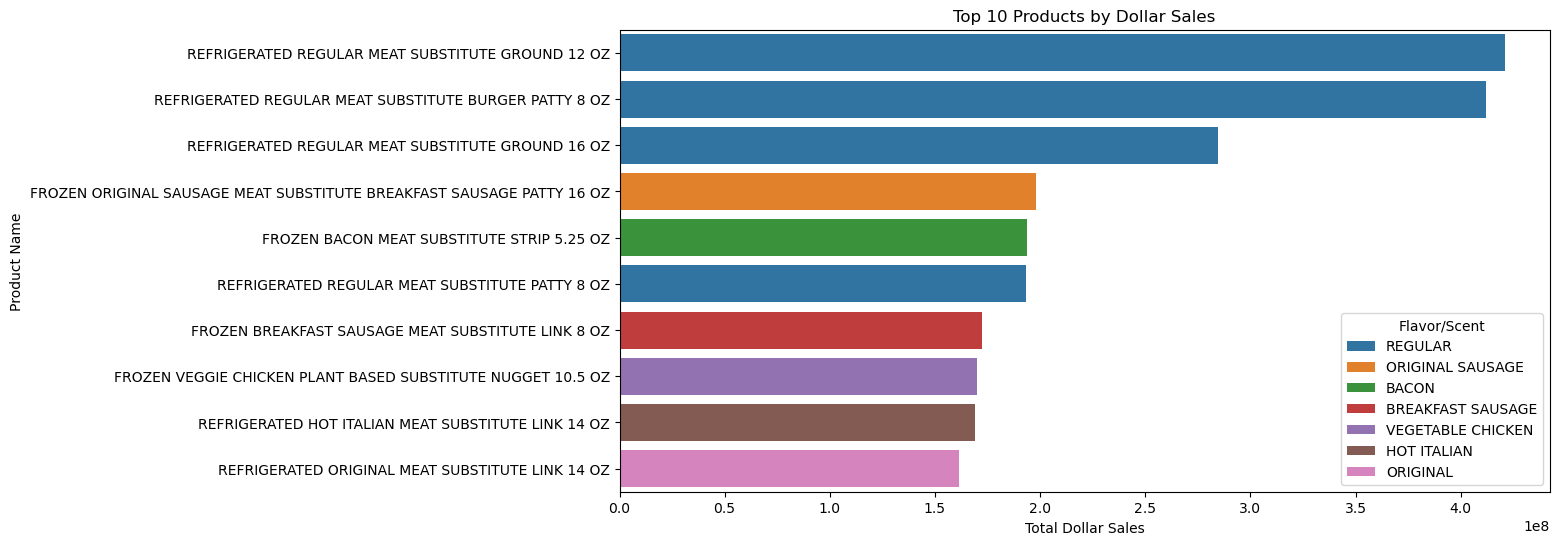

In [13]:
# Product Mix Analysis: Evaluate which products (Product Name, Flavor/Scent) are the strongest performers in terms of unit volume and dollar sales.
# Step 1: Aggregate Data by Product and Flavor
product_performance = full_fz_rfg_sub.groupby(['Product Name', 'Flavor / Scent']).agg({
    'Base Volume Sales': 'sum',
    'Dollar Sales': 'sum'
}).reset_index()

# Step 2: Rank Products by Sales Volume and Revenue
product_performance.sort_values(by='Base Volume Sales', ascending=False, inplace=True)

# Step 3: Visualize Product Performance
# Visualize the top 10 products by unit volume
plt.figure(figsize=(12, 6))
top_volume_products = product_performance.nlargest(10, 'Base Volume Sales')
sns.barplot(data=top_volume_products, x='Base Volume Sales', y='Product Name', hue='Flavor / Scent', dodge = False)
plt.title('Top 10 Products by Unit Volume Sales')
plt.xlabel('Total Volume Sales')
plt.ylabel('Product Name')
plt.legend(title='Flavor/Scent')
plt.show()

# Visualize the top 10 products by dollar sales
plt.figure(figsize=(12, 6))
top_sales_products = product_performance.nlargest(10, 'Dollar Sales')
sns.barplot(data=top_sales_products, x='Dollar Sales', y='Product Name', hue='Flavor / Scent', dodge=False)
plt.title('Top 10 Products by Dollar Sales')
plt.xlabel('Total Dollar Sales')
plt.ylabel('Product Name')
plt.legend(title='Flavor/Scent')
plt.show()

Similar, especially for the top 3 product. Dollar Sales & Volume Sales share the same ranking. 

# Report 2 Content

## Analysis: Product attributes between Morningstar & Gardein & Impossible

In [14]:
full_fz_rfg_sub.columns

Index(['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form',
       'Manufacturer Name', 'Brand Name', 'Product Name', 'Flavor / Scent',
       'Meat Source', 'Unit Sales', 'Volume Sales', 'Dollar Sales',
       'Price per Unit', 'Price per Volume', 'Base Unit Sales',
       'Base Volume Sales', 'Base Dollar Sales', 'Incremental Units',
       'Incremental Volume', 'Incremental Dollars',
       'ACV Weighted Distribution'],
      dtype='object')

In [15]:
# This will only increase top 3 companies that make plant-based meals, and focus on chicken products
filtered_df = full_fz_rfg_sub[(full_fz_rfg_sub['Product Name'].str.contains('CHICKEN')) 
                              & (full_fz_rfg_sub['Brand Name'].str.contains('GARDEIN')) 
                              | (full_fz_rfg_sub['Brand Name'].str.contains('MORNINGSTAR'))
                             | (full_fz_rfg_sub['Brand Name'].str.contains('IMPOSSIBLE'))]

In [16]:
filtered_df.head(5)

Geography  Year  Quarter  Month  Season     Form Manufacturer Name  \
Date                                                                            
2020-01-01    Plains  2020        1      1  Winter  CRUMBLE         KELLANOVA   
2020-01-01    Plains  2020        1      1  Winter   BURGER         KELLANOVA   
2020-01-01    Plains  2020        1      1  Winter   BURGER         KELLANOVA   
2020-01-01    Plains  2020        1      1  Winter   BURGER         KELLANOVA   
2020-01-01    Plains  2020        1      1  Winter   BURGER         KELLANOVA   

                                 Brand Name  \
Date                                          
2020-01-01  MORNINGSTAR FARMS MEAL STARTERS   
2020-01-01                MORNINGSTAR FARMS   
2020-01-01                MORNINGSTAR FARMS   
2020-01-01                MORNINGSTAR FARMS   
2020-01-01                MORNINGSTAR FARMS   

                                                 Product Name  \
Date                                                            
2020-01-01     FROZEN CHORIZO MEAT SUBSTITUTE CRUMBLE 13.5 OZ   
2020-01-01  FROZEN SPICY BLACK BEAN MEAT SUBSTITUTE BURGER...   
2020-01-01  FROZEN SPICY BLACK BEAN MEAT SUBSTITUTE BURGER...   
2020-01-01        FROZEN TEX MEX MEAT SUBSTITUTE BURGER 16 OZ   
2020-01-01  FROZEN TOMATO AND BASIL PIZZA MEAT SUBSTITUTE ...   

                  Flavor / Scent  ...  Dollar Sales  Price per Unit  \
Date                              ...                                 
2020-01-01               CHORIZO  ...   1897.380000        4.980000   
2020-01-01      SPICY BLACK BEAN  ...     29.550000        5.910000   
2020-01-01      SPICY BLACK BEAN  ...  22634.207508        3.997684   
2020-01-01               TEX MEX  ...    689.960000        7.340000   
2020-01-01  TOMATO & BASIL PIZZA  ...   2650.131150        4.551015   

            Price per Volume  Base Unit Sales  Base Volume Sales  \
Date                                                               
2020-01-01          5.901872       381.000000         321.487800   
2020-01-01          5.002963         4.940000           5.835622   
2020-01-01          6.732375      4755.194489        2823.634488   
2020-01-01          7.340000        94.000000          94.000000   
2020-01-01          7.664223       481.194942         285.733556   

            Base Dollar Sales  Incremental Units  Incremental Volume  \
Date                                                                   
2020-01-01        1897.380000           0.000000            0.000000   
2020-01-01          29.785300           0.060000            0.070878   
2020-01-01       19551.526125         906.635381          538.360089   
2020-01-01         689.960000           0.000000            0.000000   
2020-01-01        2257.782923         101.121519           60.045958   

            Incremental Dollars  ACV Weighted Distribution  
Date                                                        
2020-01-01             0.000000                   9.296063  
2020-01-01            -0.235300                   0.273566  
2020-01-01          3082.681384                  57.274100  
2020-01-01             0.000000                   4.566712  
2020-01-01           392.348227                  12.558085  

[5 rows x 23 columns]

### Product Ratio

In [17]:
# Process to calculate distinct products
table_1 = filtered_df.drop_duplicates('Product Name').groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Product Name':'count'}).reset_index()
table_1

Manufacturer Name        Flavor / Scent  Product Name
0         CONAGRA BRANDS               7 GRAIN             1
1         CONAGRA BRANDS              BARBEQUE             1
2         CONAGRA BRANDS               CHICKEN             6
3         CONAGRA BRANDS    CHICKEN SCALOPPINI             1
4   IMPOSSIBLE FOODS INC             BRATWURST             1
..                   ...                   ...           ...
56             KELLANOVA      VEGETABLE LOVERS             1
57             KELLANOVA  VEGETABLE MEAT LOVER             1
58             KELLANOVA        VEGETABLE PORK             1
59             KELLANOVA      WHITE BEAN CHILI             1
60             KELLANOVA           ZESTY RANCH             1

[61 rows x 3 columns]

In [18]:
new_table_1 = table_1.groupby('Manufacturer Name').agg({'Product Name':'count'}).rename(columns={'Product Name':'Product Counts'}).reset_index()
new_table_1

Manufacturer Name  Product Counts
0        CONAGRA BRANDS               4
1  IMPOSSIBLE FOODS INC               9
2             KELLANOVA              48

<strong>Kellanova is the manufacturer name for all its morningstar series products, while Conagra brans is the manufactuer name for all Gardein products.
By this table, we can tell that there are extremly huge difference between amount of product.<strong>

In [19]:
table_2 = filtered_df.groupby(['Manufacturer Name']).agg({'Product Name':'count'}).rename(columns={'Product Name':'Transaction Records'}).reset_index()
table_2

Manufacturer Name  Transaction Records
0        CONAGRA BRANDS                10941
1  IMPOSSIBLE FOODS INC                21527
2             KELLANOVA                99653

<strong> This leads to a tremendous difference in amount of sales record<strong>

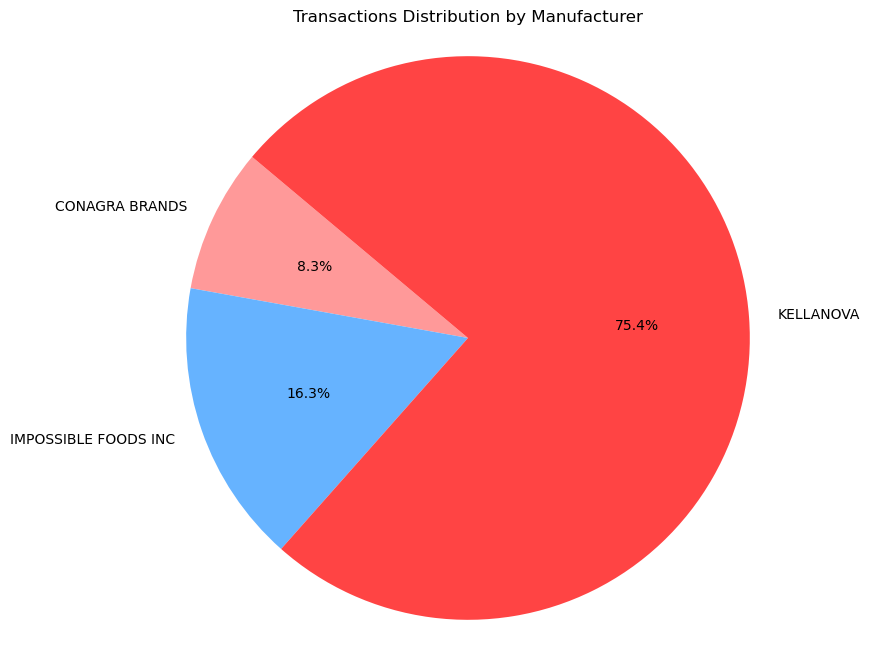

In [20]:
counts = table_2['Transaction Records'].sum()  # Summing the given values for each manufacturer

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(table_2['Transaction Records'], labels=table_2['Manufacturer Name'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#ff4444' ])
plt.title('Transactions Distribution by Manufacturer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


### Ranking by Flavor

In [21]:
table_3 = filtered_df.drop_duplicates('Product Name').groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Product Name':'count'})
table_3['total sales'] = filtered_df.groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Dollar Sales':'sum'})
table_3['product_rank'] = table_3['Product Name'].rank(ascending = False, method = 'first')
table_3['sales_rank'] = table_3['total sales'].rank(ascending = False)
table_3.head(60)

Product Name   total sales  \
Manufacturer Name    Flavor / Scent                                           
CONAGRA BRANDS       7 GRAIN                                1  1.139179e+08   
                     BARBEQUE                               1  8.384383e+06   
                     CHICKEN                                6  1.855102e+08   
                     CHICKEN SCALOPPINI                     1  3.537012e+06   
IMPOSSIBLE FOODS INC BRATWURST                              1  2.369121e+07   
                     CHICKEN                                4  1.175260e+08   
                     HOMESTYLE                              1  4.505414e+07   
                     ITALIAN                                1  5.965307e+06   
                     ITALIAN SAUSAGE                        1  1.333919e+07   
                     REGULAR                                6  7.214120e+08   
                     SAVORY                                 3  5.149151e+07   
                     SPICY                                  4  3.514959e+07   
                     SPICY SAUSAGE                          2  2.337895e+07   
KELLANOVA            BACON                                  2  1.950485e+08   
                     BARBEQUE CHICKEN                       1  1.420720e+07   
                     BREAKFAST SAUSAGE                      3  1.747002e+08   
                     BUFFALO                                4  1.761298e+08   
                     CHEDDAR                                1  5.270048e+04   
                     CHEESE                                 2  1.334509e+07   
                     CHICKEN                                3  6.688983e+07   
                     CHIPOTLE BLACK BEAN                    3  2.516483e+07   
                     CHORIZO                                2  4.684184e+07   
                     CLASSIC                                2  2.201651e+04   
                     FALAFEL                                1  8.282953e+05   
                     GARDEN                                 1  4.217641e+02   
                     GARDEN VEGETABLE                       4  1.072739e+08   
                     GRILLED                                2  9.417863e+07   
                     HOT & SPICY                            1  3.008024e+06   
                     HOT & SPICY SAUSAGE                    1  4.782857e+07   
                     ITALIAN SAUSAGE                        3  1.063414e+07   
                     LIGHTLY SEASONED                       1  7.836340e+03   
                     MAPLE                                  1  2.528096e+05   
                     MAPLE SAUSAGE                          2  1.002276e+08   
                     MEAT LOVERS                            1  5.877271e+06   
                     MEDITERRANEAN CHICK PEAS               1  9.116921e+06   
                     ORIGINAL                               9  3.551381e+08   
                     ORIGINAL SAUSAGE                       1  1.978553e+08   
                     PARMESAN GARLIC                        1  1.207632e+07   
                     REGULAR                               17  2.852135e+08   
                     ROASTED GARLIC & QUINOA                1  1.018240e+04   
                     SAUSAGE                                1  1.603609e+07   
                     SAVORY VEGETABLE                       1  1.998000e+01   
                     SAVORY VEGETABLE SAUSAGE               1  1.570007e+01   
                     SMOKED HICKORY BARBEQUE                1  4.322681e+01   
                     SPICEY INDIAN VEGETABLE                1  3.853374e+03   
                     SPICY BLACK BEAN                       2  2.315512e+08   
                     SPICY INDIAN                           1  2.354239e+03   
                     STEAK                                  1  1.296000e+01   
                     STEAKHOUSE STYLE                       1  1.138134e+06   
                    

Although there are 6 chicken products from conagra, its sales looks bad. (Sales Ranking No.8)
Compared to KELLANOVA & IMPOSSIBLE, Conagra do a better job on chicken products. However, KELLANOVA have 4 chicken products.
1. Chicken (no. 18)
2. Sweet Barbeque Chicken (no.47)
3. Vegetabel Chicken (11)
4. Barbeque Chicken (31)
and main sales maked from KELLANOVA & IMPOSSIBLE are not from chicken products. The fact that most sales earned are associated with original, bacon, baffulo flavor, sausage, and more options for customer are the reasons that there is a large gap between Conagra and these two companies.

According to table1 to table 3, suggestions could be:
1. Develop more flavor, especially regular one
2. Provide more options for single product

One reason might for regular flavor products has most sales might be:
1. people like to season it later based on their preference
2. flavor adjusted by manufacturer is just terrible

### What products should Conagra publish in the future?

In [22]:
# Set 2023 as boundary
recent_time_filtered_df = filtered_df[filtered_df['Year'] >= 2023]
past_time_filtered_df = filtered_df[filtered_df['Year'] < 2023]['Product Name']
time_product_filtered_df = recent_time_filtered_df[~recent_time_filtered_df['Product Name'].isin(past_time_filtered_df)]
time_product_filtered_df = time_product_filtered_df[['Year', 'Manufacturer Name', 'Product Name','Flavor / Scent', 'Dollar Sales']]
time_product_filtered_df.drop_duplicates('Product Name').sort_values('Dollar Sales', ascending = False) #table 4

Year     Manufacturer Name  \
Date                                     
2023-11-01  2023  IMPOSSIBLE FOODS INC   
2023-02-01  2023             KELLANOVA   
2023-02-01  2023  IMPOSSIBLE FOODS INC   
2023-02-01  2023  IMPOSSIBLE FOODS INC   
2023-02-01  2023  IMPOSSIBLE FOODS INC   
2023-06-01  2023  IMPOSSIBLE FOODS INC   
2023-09-01  2023             KELLANOVA   
2023-03-01  2023             KELLANOVA   
2023-09-01  2023             KELLANOVA   
2023-01-01  2023             KELLANOVA   

                                                 Product Name  \
Date                                                            
2023-11-01  FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE ...   
2023-02-01  FROZEN ORIGINAL MEAT SUBSTITUTE SAUSAGE PATTY ...   
2023-02-01  FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE ...   
2023-02-01  FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE NU...   
2023-02-01  FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE PA...   
2023-06-01  REFRIGERATED REGULAR MEAT SUBSTITUTE PATTY 10....   
2023-09-01       FROZEN CHEDDAR MEAT SUBSTITUTE FRIES 13.5 OZ   
2023-03-01  FROZEN ORIGINAL PLANT BASED CHICKEN SUBSTITUTE...   
2023-09-01  FROZEN STEAKHOUSE STYLE MEAT SUBSTITUTE BURGER...   
2023-01-01  FROZEN CHICKEN PLANT BASED SUBSTITUTE NUGGET 8 OZ   

              Flavor / Scent  Dollar Sales  
Date                                        
2023-11-01           CHICKEN   2335.720000  
2023-02-01          ORIGINAL   2036.600000  
2023-02-01           CHICKEN   1114.694972  
2023-02-01             SPICY    481.104507  
2023-02-01             SPICY    472.056896  
2023-06-01           REGULAR    401.384809  
2023-09-01           CHEDDAR     42.392854  
2023-03-01          ORIGINAL     17.989496  
2023-09-01  STEAKHOUSE STYLE     17.383378  
2023-01-01           CHICKEN      4.490000

### Trend Plot

/var/folders/cr/w41p_r656b17sf3g2fyh6wnm0000gn/T/ipykernel_68254/3681078267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Period'] = filtered_df['Year'].astype(str) + ' Q' + filtered_df['Quarter'].astype(str)


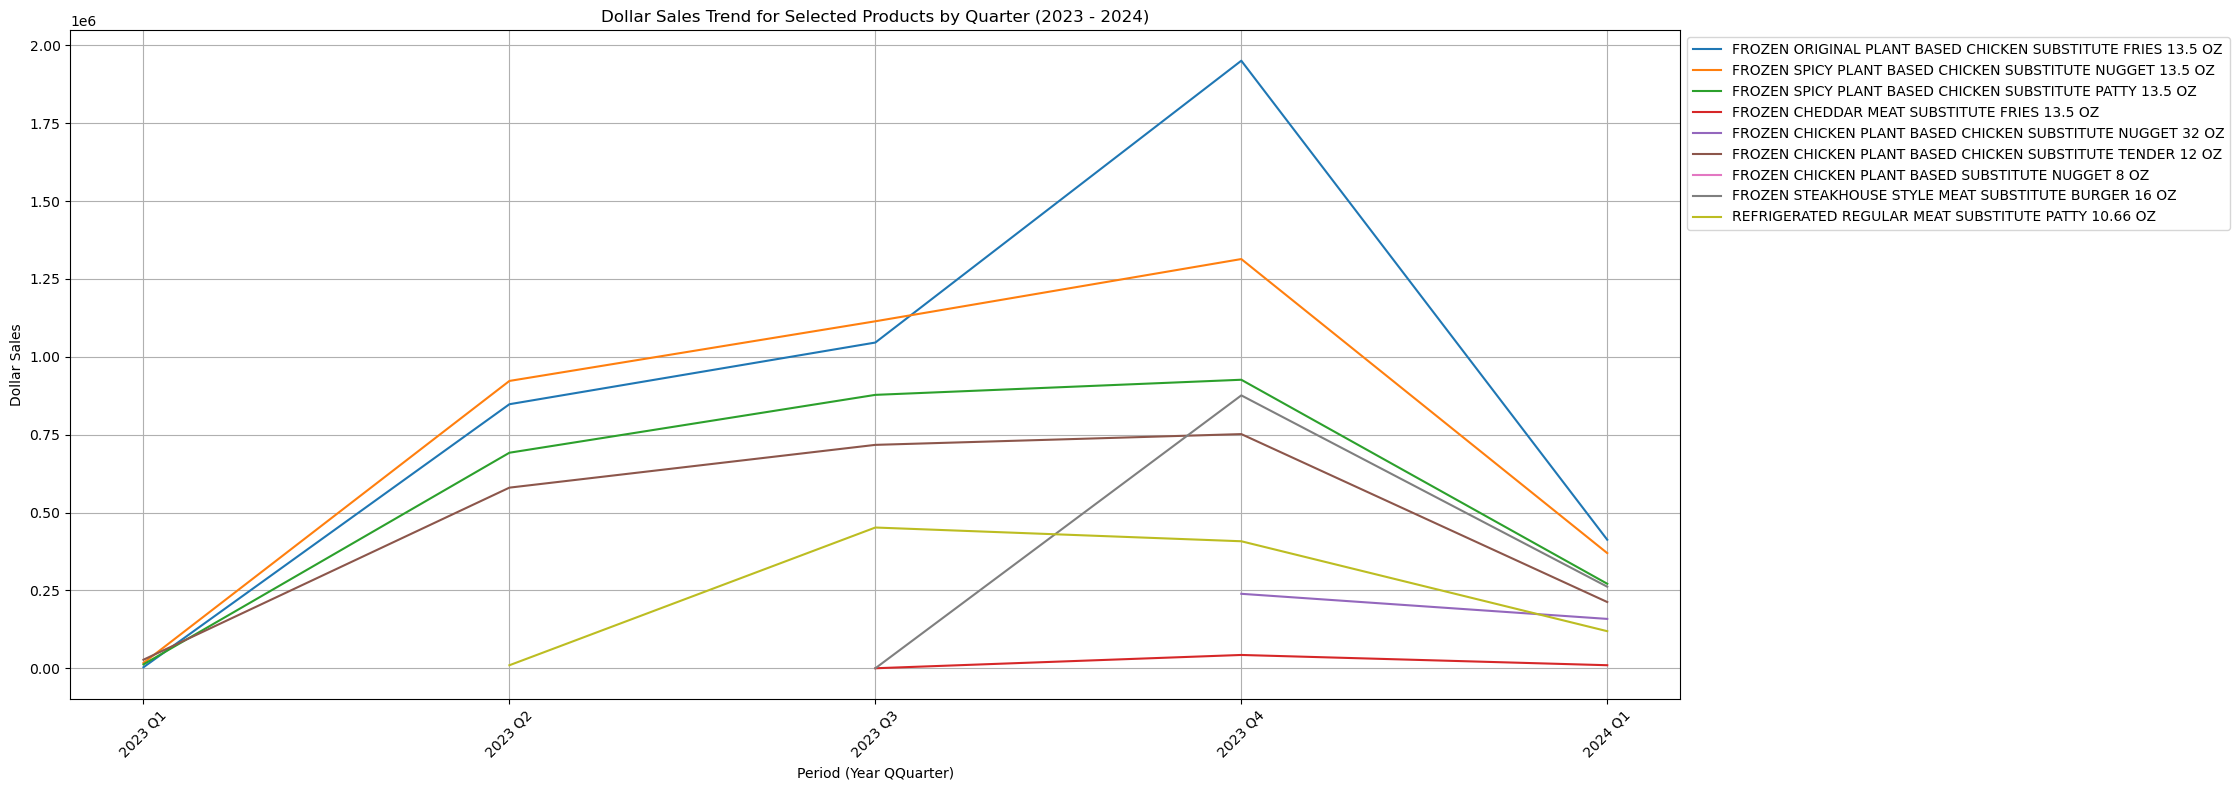

In [23]:
filtered_df['Period'] = filtered_df['Year'].astype(str) + ' Q' + filtered_df['Quarter'].astype(str)

products_of_interest = ['FROZEN ORIGINAL PLANT BASED CHICKEN SUBSTITUTE FRIES 13.5 OZ',
                        'FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE NUGGET 13.5 OZ',
                        'FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE PATTY 13.5 OZ',
                       'FROZEN CHEDDAR MEAT SUBSTITUTE FRIES 13.5 OZ',
                       'FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE NUGGET 32 OZ',
                       'FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE TENDER 12 OZ',
                       'FROZEN CHICKEN PLANT BASED SUBSTITUTE NUGGET 8 OZ',
                       'FROZEN STEAKHOUSE STYLE MEAT SUBSTITUTE BURGER 16 OZ',
                       'REFRIGERATED REGULAR MEAT SUBSTITUTE PATTY 10.66 OZ']

product_filtered_df = filtered_df[filtered_df['Product Name'].isin(products_of_interest)]

# Aggregate 'Dollar Sales' by 'Year' and 'Product Name'
aggregated_df = product_filtered_df.groupby(['Period', 'Product Name']).agg({'Dollar Sales': 'sum'}).reset_index()

# Pivot the DataFrame to have 'Product Name' as columns, 'Year' as the index, and 'Dollar Sales' as values
pivoted_df = aggregated_df.pivot(index='Period', columns='Product Name', values='Dollar Sales')
pivoted_df

# Plot the line plot
plt.figure(figsize=(30, 8))
for product in products_of_interest:
    plt.plot(pivoted_df.index, pivoted_df[product], label=product)

plt.title('Dollar Sales Trend for Selected Products by Quarter (2023 - 2024)')
plt.xlabel('Period (Year QQuarter)')
plt.ylabel('Dollar Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Place the legend outside the plot to the right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the plot to ensure everything fits without overlapping
plt.show()


Things than can conlude from table 4 & visualization above:
1. 10 new plant-based products were published since 2023, but none of the comes from Gardein
2. Top 3 products that sales most are:
    1. FROZEN ORIGINAL PLANT BASED CHICKEN SUBSTITUTE FRIES 13.5 OZ
    2. FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE NUGGET 13.5 OZ
    3. FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE PATTY 13.5 OZ
3. Based on this situation, these three products are presenting upword trend. This indicates that more people tend to buy such products. Or, these kind of products are attracting buyers. Thus, Conagra might also develop this kind of products
4. "Refrigerated Regular Meat Substitute Patty" probably is not a good idea for Gardein as it present downword trend since 2023 Q3.
5. Again, data in 2024 is not sufficent. 

### Package Size Impact

In [89]:
model_dataset = filtered_df[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name', 'Flavor / Scent', 'Product Name', 'Unit Sales', 'Volume Sales', 'Dollar Sales']].reset_index()
model_dataset = model_dataset[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name', 'Flavor / Scent', 'Product Name', 'Unit Sales', 'Volume Sales', 'Dollar Sales']]
model_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132121 entries, 0 to 132120
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Geography          132121 non-null  object 
 1   Year               132121 non-null  int64  
 2   Quarter            132121 non-null  int64  
 3   Month              132121 non-null  int64  
 4   Season             132121 non-null  object 
 5   Form               132121 non-null  object 
 6   Manufacturer Name  132121 non-null  object 
 7   Flavor / Scent     132121 non-null  object 
 8   Product Name       132121 non-null  object 
 9   Unit Sales         132121 non-null  float64
 10  Volume Sales       132121 non-null  float64
 11  Dollar Sales       132121 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 12.1+ MB


In [90]:
def extract_size(row):
    return row.split(' ')[-2]

def map_size_into_text(row):
    if row <= 12:
        return 'Small'
    elif row >= 18:
        return 'Large'
    else:
        return 'Medium'

In [91]:
model_dataset['Package Size'] = model_dataset['Product Name'].apply(extract_size)
model_dataset['Package Size'] = model_dataset['Package Size'].astype(float)

In [92]:
model_dataset = model_dataset[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Manufacturer Name', 'Form', 'Flavor / Scent', 'Package Size', 'Unit Sales', 'Volume Sales', 'Dollar Sales']]
model_dataset = model_dataset.rename(columns={"Dollar Sales": "Dollar_Sales", "Flavor / Scent": "Flavor"})
model_dataset['Portion'] = model_dataset['Package Size'].apply(map_size_into_text)
model_dataset

Geography  Year  Quarter  Month  Season     Manufacturer Name  \
0            Plains  2020        1      1  Winter             KELLANOVA   
1            Plains  2020        1      1  Winter             KELLANOVA   
2            Plains  2020        1      1  Winter             KELLANOVA   
3            Plains  2020        1      1  Winter             KELLANOVA   
4            Plains  2020        1      1  Winter             KELLANOVA   
...             ...   ...      ...    ...     ...                   ...   
132116  Great Lakes  2024        1      1  Winter  IMPOSSIBLE FOODS INC   
132117  Great Lakes  2024        1      1  Winter             KELLANOVA   
132118  Great Lakes  2024        1      1  Winter             KELLANOVA   
132119  Great Lakes  2024        1      1  Winter             KELLANOVA   
132120  Great Lakes  2024        1      1  Winter        CONAGRA BRANDS   

           Form                Flavor  Package Size   Unit Sales  \
0       CRUMBLE               CHORIZO          13.5   381.000000   
1        BURGER      SPICY BLACK BEAN          18.9     5.000000   
2        BURGER      SPICY BLACK BEAN           9.5  5661.829870   
3        BURGER               TEX MEX          16.0    94.000000   
4        BURGER  TOMATO & BASIL PIZZA           9.5   582.316461   
...         ...                   ...           ...          ...   
132116   NUGGET               CHICKEN          13.5  3920.626210   
132117    PATTY              ORIGINAL          20.0  3246.797978   
132118   NUGGET               REGULAR          13.5   310.329771   
132119  POPCORN               REGULAR           8.0  1924.119501   
132120     WING               CHICKEN          14.8  1921.925312   

        Volume Sales  Dollar_Sales Portion  
0         321.487800   1897.380000  Medium  
1           5.906500     29.550000   Large  
2        3361.994577  22634.207508   Small  
3          94.000000    689.960000  Medium  
4         345.779515   2650.131150   Small  
...              ...           ...     ...  
132116   3308.224396  27898.931826  Medium  
132117   4058.497473  26683.634939   Large  
132118    261.856261   1965.168753  Medium  
132119    962.059751   8539.427168   Small  
132120   1777.780913  16141.156662  Medium  

[132121 rows x 13 columns]

In [93]:
model_dataset['Package Size'].describe() # show column statistic data

count    132121.000000
mean         13.360989
std           7.494509
min           5.250000
25%           9.500000
50%          12.000000
75%          14.100000
max          56.000000
Name: Package Size, dtype: float64

In [94]:
model_dataset['Package Size'].unique() # show what values are in there

array([13.5 , 18.9 ,  9.5 , 16.  ,  8.  , 16.2 ,  9.4 , 18.  , 12.  ,
        9.  , 10.  ,  8.4 , 50.8 ,  5.25, 20.  , 10.5 , 21.  ,  9.75,
       40.  , 31.5 , 15.75, 56.  , 40.8 , 32.  ,  7.9 ,  8.5 , 36.  ,
       10.3 , 14.1 , 15.  ,  6.5 , 14.7 , 24.  , 14.  , 14.6 , 14.8 ,
       12.8 , 42.8 , 10.66])

Based on this information, I will categorize any package size that:
1. smaller than and equal to  12 as "Small"
2. greater than and equal to 20 as "Large"
3. smaller than 18 & greater than 12 as "Medium"

Logic behind this is using mean as threshold and +1 std to mean for large boundary

In [95]:
model_dataset.groupby(['Portion', 'Manufacturer Name']).agg({'Dollar_Sales':'sum'})

Dollar_Sales
Portion Manufacturer Name                 
Large   IMPOSSIBLE FOODS INC  1.282331e+08
        KELLANOVA             3.992261e+08
Medium  CONAGRA BRANDS        1.630588e+08
        IMPOSSIBLE FOODS INC  3.282860e+08
        KELLANOVA             3.826878e+08
Small   CONAGRA BRANDS        1.482907e+08
        IMPOSSIBLE FOODS INC  5.804889e+08
        KELLANOVA             1.912288e+09

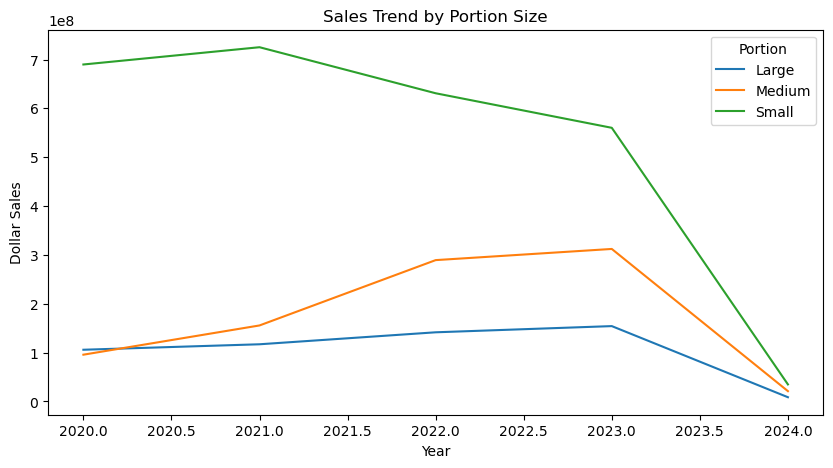

In [83]:
# Step 2: Group by 'Year' and 'Portion', and sum the 'Dollar_Sales'
grouped_df = model_dataset.groupby(['Year', 'Portion'])['Dollar_Sales'].sum().reset_index()

# Step 3: Pivot the DataFrame to have 'Year' as index and 'Portion' as columns
pivot_df = grouped_df.pivot(index='Year', columns='Portion', values='Dollar_Sales')

# Step 4: Plot the data
pivot_df.plot(kind='line', figsize=(10, 5))

# Add title and labels
plt.title('Sales Trend by Portion Size')
plt.xlabel('Year')
plt.ylabel('Dollar Sales')

# Show the plot
plt.show()


Pattern:
1. Data is not sufficient in 2024, so the trend will goes down for sure
2. Altough small size present downword trend, it's still selling most
3. Medium size has a obvious upword trend since 2021
4. Large size slightly increase by time

Conclusion:
1. it should focus on small and medium size portion when Conagra publish new products


### Anova & Post-Hoc Analysis: Further proof for publish chicken products

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [123]:
model = ols('Dollar_Sales ~ C(Flavor)', data=model_dataset).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_results)

# Perform Tukey's HSD test if the ANOVA is significant
if anova_results['PR(>F)'][0] < 0.05:
    tukey_results = pairwise_tukeyhsd(endog=model_dataset['Dollar_Sales'], groups=model_dataset['Flavor'], alpha=0.05)
    #print(tukey_results)


                 sum_sq        df           F  PR(>F)
C(Flavor)  9.827841e+13     378.0  182.126608     0.0
Residual   1.415280e+15  991401.0         NaN     NaN


<strong>ANOVA results shows that there are significant difference between different Flavor.<strong>

In [35]:
model_dataset['CHICKEN'] = model_dataset['Flavor'].apply(lambda flavor: 'CHICKEN' if 'CHICKEN' in flavor.upper() else 'NOT CHICKEN')
model_dataset

Geography  Year  Quarter  Month  Season    Form  \
0          Total US  2020        1      1  Winter  GROUND   
1            Plains  2020        1      1  Winter  BURGER   
2            Plains  2020        1      1  Winter  BURGER   
3            Plains  2020        1      1  Winter  BURGER   
4            Plains  2020        1      1  Winter  BURGER   
...             ...   ...      ...    ...     ...     ...   
991775  Great Lakes  2024        1      1  Winter    WING   
991776  Great Lakes  2024        1      1  Winter    WING   
991777  Great Lakes  2024        1      1  Winter   PIECE   
991778  Great Lakes  2024        1      1  Winter   PIECE   
991779         West  2024        1      1  Winter   SLICE   

                        Flavor Package Size   Unit Sales  Volume Sales  \
0                  GROUND BEEF           16    49.378093     49.378093   
1       ALL AMERICAN VEGETABLE           30   107.648604    201.841133   
2            GRILLED VEGETABLE           10   147.523070     92.201919   
3                     ORIGINAL           10  1965.485987   1228.428742   
4                     ORIGINAL           30   104.310840    195.582824   
...                        ...          ...          ...           ...   
991775                 CHICKEN         14.8  1921.925312   1777.780913   
991776                 BUFFALO            8   129.408662     64.704331   
991777                   CAJUN            8  1541.475390    770.737695   
991778              LEMON HERB            8   748.430966    374.215483   
991779           SALT & PEPPER          5.5  3936.492162   1353.366005   

        Dollar_Sales      CHICKEN  
0         419.220014  NOT CHICKEN  
1        1068.967501  NOT CHICKEN  
2         615.346997  NOT CHICKEN  
3        6963.944937  NOT CHICKEN  
4         843.466337  NOT CHICKEN  
...              ...          ...  
991775  16141.156662      CHICKEN  
991776    850.878911  NOT CHICKEN  
991777   9261.539939  NOT CHICKEN  
991778   4530.765518  NOT CHICKEN  
991779  12019.749412  NOT CHICKEN  

[991780 rows x 12 columns]

In [36]:
from scipy import stats

# Assuming model_dataset is your DataFrame and it has a 'Dollar Sales' column

# Separate the two groups
chicken_sales = model_dataset[model_dataset['CHICKEN'] == 'CHICKEN']['Dollar_Sales']
not_chicken_sales = model_dataset[model_dataset['CHICKEN'] == 'NOT CHICKEN']['Dollar_Sales']

# Perform t-test
t_stat, p_value = stats.ttest_ind(chicken_sales, not_chicken_sales, equal_var=False)  # Welch's t-test for unequal variances

# If you're testing if chicken sales are greater, only proceed if t_stat is positive
if t_stat > 0:
    # Divide p-value by 2 for a one-tailed test
    one_tailed_p_value = p_value / 2
    
    # Output the result for the one-tailed test
    if one_tailed_p_value < 0.05:
        print(f"Chicken products have significantly higher sales than not chicken products (one-tailed p-value: {one_tailed_p_value}).")
    else:
        print(f"Chicken products do not have significantly higher sales than not chicken products (one-tailed p-value: {one_tailed_p_value}).")
else:
    print("The test statistic is not in the direction of the hypothesis (chicken sales being higher), so we cannot perform a one-tailed test in this direction.")



Chicken products have significantly higher sales than not chicken products (one-tailed p-value: 8.357307775823266e-38).


<strong>Well, the one-tailed t-test implies that it might be good for Conagra to publish chicken flavor products as they're selling more than other flavor products<strong>

In [54]:
model_dataset['Portion'] = model_dataset['Package Size'].apply(map_size_into_text)
model_dataset

Geography  Year  Quarter  Month  Season    Form  \
0          Total US  2020        1      1  Winter  GROUND   
1            Plains  2020        1      1  Winter  BURGER   
2            Plains  2020        1      1  Winter  BURGER   
3            Plains  2020        1      1  Winter  BURGER   
4            Plains  2020        1      1  Winter  BURGER   
...             ...   ...      ...    ...     ...     ...   
991775  Great Lakes  2024        1      1  Winter    WING   
991776  Great Lakes  2024        1      1  Winter    WING   
991777  Great Lakes  2024        1      1  Winter   PIECE   
991778  Great Lakes  2024        1      1  Winter   PIECE   
991779         West  2024        1      1  Winter   SLICE   

                        Flavor  Package Size   Unit Sales  Volume Sales  \
0                  GROUND BEEF          16.0    49.378093     49.378093   
1       ALL AMERICAN VEGETABLE          30.0   107.648604    201.841133   
2            GRILLED VEGETABLE          10.0   147.523070     92.201919   
3                     ORIGINAL          10.0  1965.485987   1228.428742   
4                     ORIGINAL          30.0   104.310840    195.582824   
...                        ...           ...          ...           ...   
991775                 CHICKEN          14.8  1921.925312   1777.780913   
991776                 BUFFALO           8.0   129.408662     64.704331   
991777                   CAJUN           8.0  1541.475390    770.737695   
991778              LEMON HERB           8.0   748.430966    374.215483   
991779           SALT & PEPPER           5.5  3936.492162   1353.366005   

        Dollar_Sales      CHICKEN Portion  
0         419.220014  NOT CHICKEN  Medium  
1        1068.967501  NOT CHICKEN   Large  
2         615.346997  NOT CHICKEN   Small  
3        6963.944937  NOT CHICKEN   Small  
4         843.466337  NOT CHICKEN   Large  
...              ...          ...     ...  
991775  16141.156662      CHICKEN  Medium  
991776    850.878911  NOT CHICKEN   Small  
991777   9261.539939  NOT CHICKEN   Small  
991778   4530.765518  NOT CHICKEN   Small  
991779  12019.749412  NOT CHICKEN   Small  

[991780 rows x 13 columns]

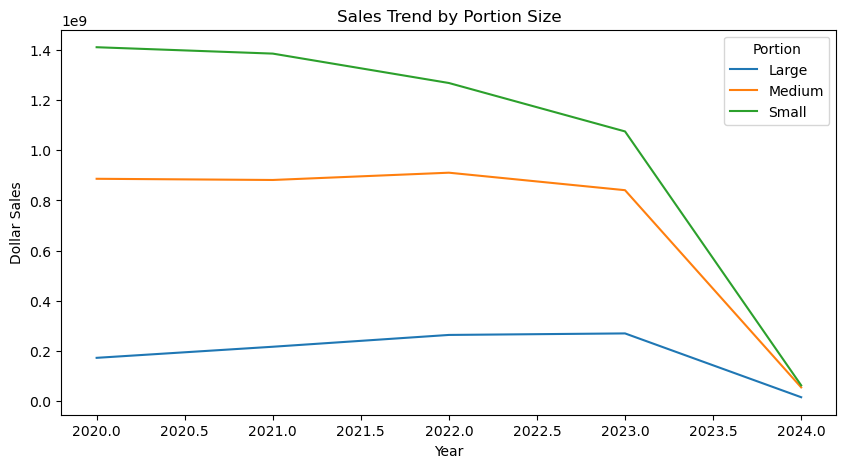

In [55]:
import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Group by 'Year' and 'Portion', and sum the 'Dollar_Sales'
grouped_df = model_dataset.groupby(['Year', 'Portion'])['Dollar_Sales'].sum().reset_index()

# Step 3: Pivot the DataFrame to have 'Year' as index and 'Portion' as columns
pivot_df = grouped_df.pivot(index='Year', columns='Portion', values='Dollar_Sales')

# Step 4: Plot the data
pivot_df.plot(kind='line', figsize=(10, 5))

# Add title and labels
plt.title('Sales Trend by Portion Size')
plt.xlabel('Year')
plt.ylabel('Dollar Sales')

# Show the plot
plt.show()


In [50]:
model_dataset.groupby('Portion').agg({'Dollar_Sales':'sum'})

Dollar_Sales
Portion              
Large    9.384120e+08
Medium   3.574869e+09
Small    5.203646e+09

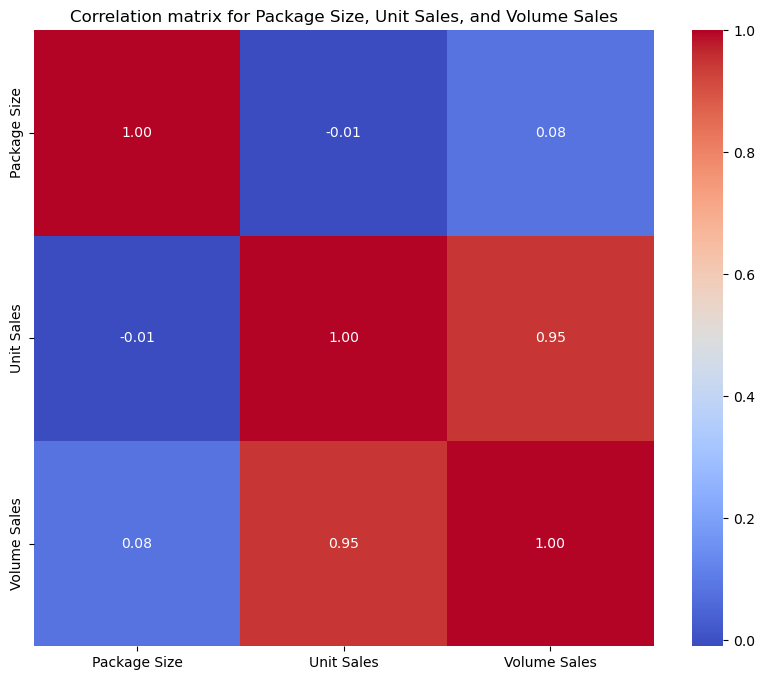

In [39]:
# Assuming 'model_dataset' is your DataFrame and it's already been loaded with your data.
# We will just consider the relevant columns for the correlation matrix.
relevant_columns = model_dataset[['Package Size', 'Unit Sales', 'Volume Sales']]

# Calculating the correlation matrix
correlation_matrix = relevant_columns.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
heatmap.set_title('Correlation matrix for Package Size, Unit Sales, and Volume Sales')

plt.show()


In [40]:
# Assuming your dataframe is named df and you have converted 'Package Size' to int
# Prepare the data for modeling
X = model_dataset[['Package Size', 'Unit Sales', 'Volume Sales']]  # independent variable
y = model_dataset['Dollar_Sales']  # dependent variable

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:           Dollar_Sales   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 5.468e+06
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:30:12   Log-Likelihood:            -1.0473e+07
No. Observations:              991780   AIC:                         2.095e+07
Df Residuals:                  991776   BIC:                         2.095e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -453.5968     20.084    -22.585   

R is good. All three independent variables are significant.